<a href="https://colab.research.google.com/github/alirexafxali/HopfieldNN/blob/main/Hopfield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

2- Patterns and Neurons



In [ ]:
N = 25

p1 = np.array([[1,1,1,1,1],
              [1,-1,-1,-1,1],
              [1,-1,1,-1,1],
              [1,-1,-1,-1,1],
              [1,1,1,1,1]])

p2 = np.array([[1,1,1,1,1],
              [1,1,1,1,1],
              [-1,-1,-1,-1,-1],
              [1,1,1,1,1],
              [1,1,1,1,1]])
p3 = p2.T

p_noisy = np.array([[-1,1,1,1,-1],
              [1,1,-1,1,1],
              [1,1,-1,-1,1],
              [1,1,-1,1,1],
              [1,1,-1,1,-1]])

3- Patterns plot

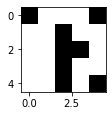

In [ ]:
fig = plt.figure(figsize = (5, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

plt.subplot(3, 3,1)
plt.imshow(np.where((p_noisy)<1, 0, 1), cmap='gray')

4- Weight matrix

In [ ]:
W = np.zeros((5, 5))

for i in range(0, 5):
  for j in range(0, 5):
    if i == j:
      W[i, j] = 0
    else:
      W[i, j] = 1/N * np.sum(((p1.flatten()[i] * p1.flatten()[j]), (p2.flatten()[i] * p2.flatten()[j]), (p3.flatten()[i] * p3.flatten()[j])))


In [ ]:
print(W)

[[0.   0.12 0.04 0.12 0.12]
 [0.12 0.   0.04 0.12 0.12]
 [0.04 0.04 0.   0.04 0.04]
 [0.12 0.12 0.04 0.   0.12]
 [0.12 0.12 0.04 0.12 0.  ]]


In [ ]:
def match(p_test1, p_k):  
  m_k = (1/N) * np.sum(np.multiply(p_test1,p_k.flatten()), axis=0)
  return m_k


In [ ]:
#asyncCorrection
p_test = p_noisy.flatten()


for iteration in range (0, 15):
  for j in range(0, 25):
    m_1 = match(p_test, p1)
    m_2 = match(p_test, p2)
    m_3 = match(p_test, p3)

    p_test[j] = np.sign((m_1 *p1.flatten()[j]) + (m_2 *p2.flatten()[j]) + (m_3 *p3.flatten()[j]))

output1 = p_test.reshape(5,5)
print(output1)



[[ 1  1 -1  1  1]
 [ 1  1 -1  1  1]
 [ 1  1 -1  1  1]
 [ 1  1 -1  1  1]
 [ 1  1 -1  1  1]]


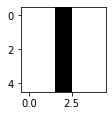

In [ ]:

fig = plt.figure(figsize = (5, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

plt.subplot(3, 3,1)
plt.imshow(np.where((output1)<1, 0, 1), cmap='gray')

In [ ]:
#syncCorrection
ps_test = p1.flatten()
for iteration2 in range (0, 15):
  m_1_s = match(ps_test, p1)
  m_2_s = match(ps_test, p2)
  m_3_s = match(ps_test, p3)

  p_test_s = np.sign((m_1_s *p1 + m_2_s *p2+ m_3_s *p3))

output2 = ps_test.reshape(5,5)
print(output2)

[[ 1  1  1  1  1]
 [ 1 -1 -1 -1  1]
 [ 1 -1  1 -1  1]
 [ 1 -1 -1 -1  1]
 [ 1  1  1  1  1]]


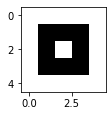

In [ ]:
fig = plt.figure(figsize = (5, 5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

plt.subplot(3, 3,1)
plt.imshow(np.where((output2)<1, 0, 1), cmap='gray')